In [39]:
# importing the packages

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split

In [40]:
# importing the saved file path

train = pd.read_csv('credit2_train.csv')
test = pd.read_csv('credit2_test.csv')

In [41]:
# checking the first five rows of my train dataset

train.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status,form_field99,form_field54,form
0,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,...,0.0,0.0,1,-999.000000,1.129518,0.044335,0,3436.0,0.0,2
1,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,...,-999.0,0.0,1,349.805730,1.620483,0.322436,0,3456.0,0.0,2
2,3276.0,0.53845,3.1510,0.0,6.282,-999.0,956940.0,-999.0,192944.0,1079864.0,...,0.0,0.0,1,-999.000000,1.513370,0.011640,1,2277.0,0.0,2
3,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,...,-999.0,0.0,1,89.940100,0.664452,0.082729,0,195538.0,0.0,2
4,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,...,0.0,0.0,1,97.887502,1.427891,0.045630,0,4926.0,0.0,2


In [42]:
# cheking the first five rows of my test dataset

test.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,form_field99,form_field54,form
0,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,0.0,...,0.800000,-999.0,0.0,1,-999.000000,0.000000,0.011221,421800.0,0.0,2
1,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,18308285.0,...,0.623248,1.0,0.0,0,-999.000000,0.504974,0.043525,3284.0,9.0,12
2,-999.0,0.27505,0.0600,0.0000,0.0,-999.0,-999.0,-999.0,-999.0,0.0,...,-999.000000,-999.0,-999.0,1,-999.000000,0.000000,-999.000000,-1998.0,0.0,2
3,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,493641.0,...,0.464224,-999.0,-999.0,1,90.163742,0.788809,0.104029,3232.0,0.0,2
4,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,5752921.0,...,0.726688,0.0,0.0,0,1303.587148,1.637733,0.163124,23305.0,2.5,12


In [43]:
# creating a varaiable for default_status and dropping it

X = train.drop('default_status', axis=1)
y = train.default_status

In [44]:
# importing the train_test_split function

from sklearn.model_selection import train_test_split

In [45]:
# splitting my train & test data into train & validation

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [47]:
model=LGBMClassifier(iterations=1000, #leaf_estimation_iterations=10,#800
                              learning_rate=0.1,
                              depth=4,loss_function='MultiClass',#,scale_pos_weight=200,
                             #l2_leaf_reg=5,
                             bootstrap_type='Bernoulli',
                              subsample=0.9,
                              eval_metric='AUC',
                              metric_period=20,
                                   #class_weights=0,
                              #od_type='Iter',
                              #od_wait=45,
                              #random_seed=10,
                              allow_writing_files=False)

In [48]:
#fitting my model on x&y

model.fit(X,y)

[LightGBM] [Warning] Unknown parameter: loss_function
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: bootstrap_type
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: metric_period
[LightGBM] [Warning] Unknown parameter: allow_writing_files


LGBMClassifier(allow_writing_files=False, boosting_type='gbdt',
               bootstrap_type='Bernoulli', class_weight=None,
               colsample_bytree=1.0, depth=4, eval_metric='AUC',
               importance_type='split', iterations=1000, learning_rate=0.1,
               loss_function='MultiClass', max_depth=-1, metric_period=20,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=0.9, subsample_for_bin=200000, subsample_freq=0)

In [49]:
# saving my model prediction

y_pred=model.predict_proba(test)[:, 1]

In [50]:
# importing the AUC(scoring) function

from sklearn.metrics import roc_auc_score

In [51]:

#printing my prediction
print(roc_auc_score(y_val, model.predict_proba(X_val)[:, 1]))

0.879995628820295


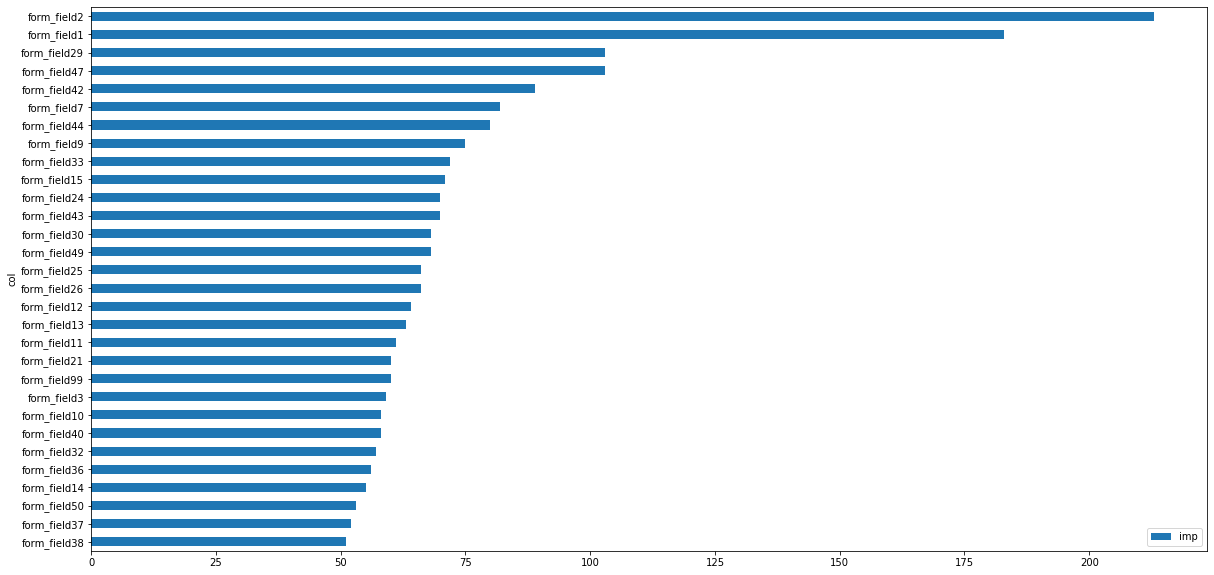

In [52]:
# looking at the feature importance

fea_imp = pd.DataFrame({'imp':model.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
plt.savefig('catboost_feature_importance.png')

In [58]:
# checking the test_predictions.head()

In [59]:
# generating a submission file for your model into a file path